In [118]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_moons
from sklearn.inspection import DecisionBoundaryDisplay

In [119]:

X, y = make_moons(600,noise=0.25)

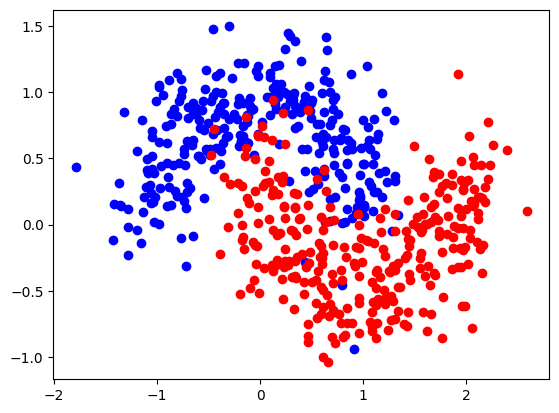

In [120]:
plt.scatter(X[y==0,0],X[y==0,1],c='blue')
plt.scatter(X[y==1,0],X[y==1,1],c='red')

# 3. Lancez un apprentissage de 4 SVM sur ces données :

In [121]:
svm_line=SVC(kernel='linear')
svm_line.fit(X,y)
svm_rbf=SVC(kernel='rbf')
svm_rbf.fit(X,y)
svm_poly=SVC(kernel='poly')
svm_poly.fit(X,y)
svm_sig=SVC(kernel='sigmoid')
svm_sig.fit(X,y)
pass

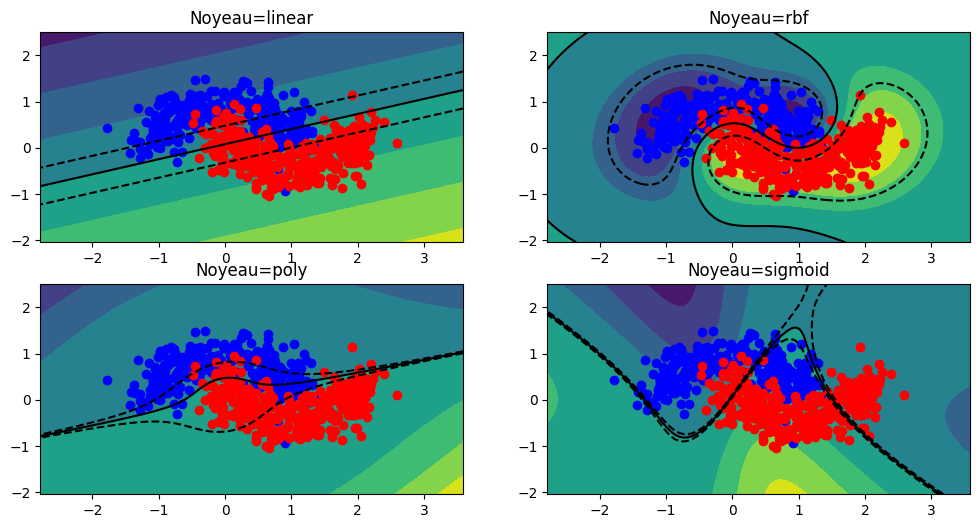

In [122]:
kernel=['linear','rbf','poly','sigmoid']
score=[]
fig , ax = plt.subplots (2, 2, figsize =(12, 6))
ax=ax.flatten()
for i,noyeau in enumerate(kernel):

    clf=SVC(kernel=noyeau)
    clf.fit(X,y)
    score.append(clf.score(X,y)*100)  
    DecisionBoundaryDisplay.from_estimator(clf , X, ax=ax[i])
    DecisionBoundaryDisplay.from_estimator(clf , X, ax=ax[i] ,
    response_method="decision_function", plot_method="contour", levels =[-1, 0, 1],
    colors =["k", "k", "k"], linestyles =["--", "-", "--"])

    ax[i].set_title(f'Noyeau={noyeau}')
    ax[i].scatter(X[y==0,0],X[y==0,1],c='blue')
    ax[i].scatter(X[y==1,0],X[y==1,1],c='red')
    
plt.show()

# 5. Mesurez les performances de ces modèles sur les données d’apprentissage

<BarContainer object of 4 artists>

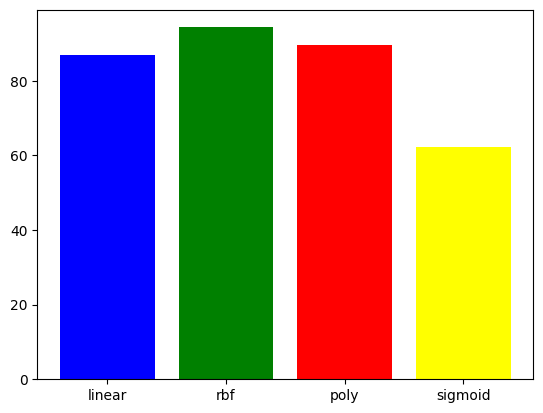

In [123]:
couleurs = ['blue', 'green', 'red','yellow']  
plt.bar(kernel, score, color=couleurs)


# 2. Testez toutes les valeurs de paramètres C et γ suivantes 

In [124]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.5,stratify=y)

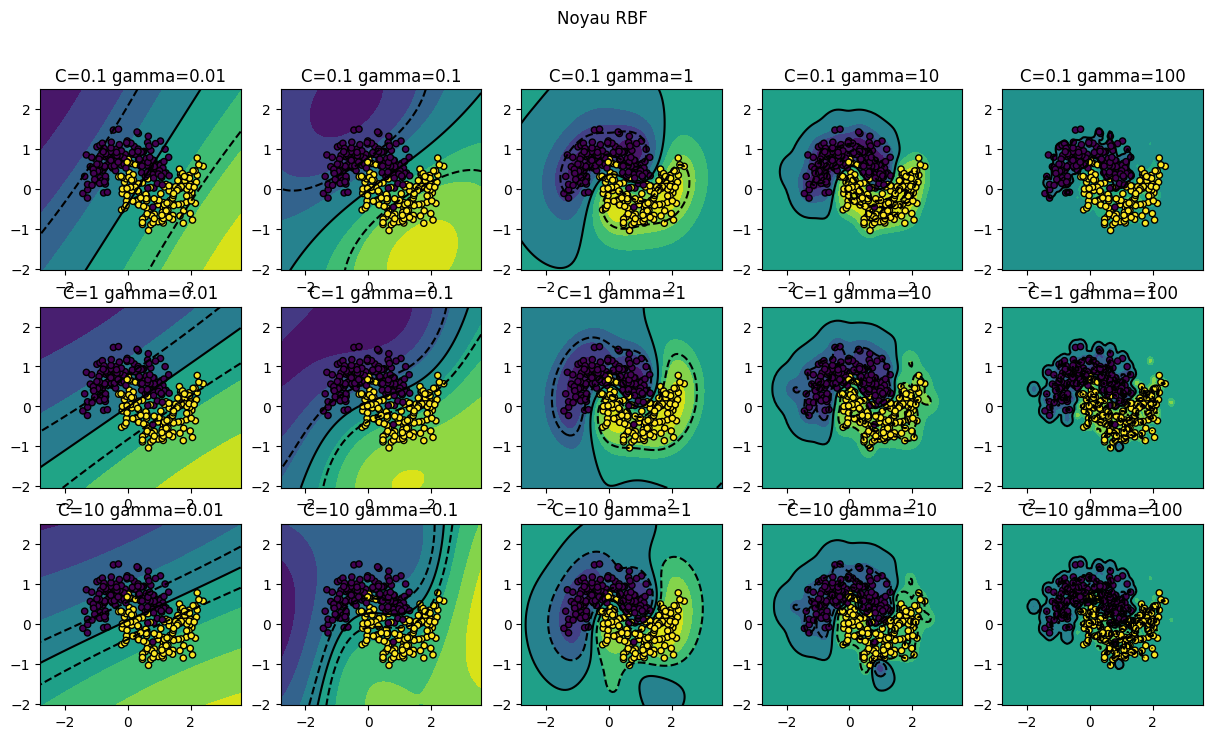

In [125]:
C=[0.1,1,10]
gamma=[0.01, 0.1, 1, 10, 100]
fig , ax = plt.subplots (3, 5, figsize =(15, 8))
ax=ax.flatten()
index=0
for c in C:
    for g in gamma :
            clf=SVC(kernel='rbf',C=c,gamma=g)
            clf.fit(X,y)
            score.append(clf.score(X,y)*100)  
            plt.suptitle('Noyau RBF')

            DecisionBoundaryDisplay.from_estimator(clf , X, ax=ax[index])
            DecisionBoundaryDisplay.from_estimator(clf , X, ax=ax[index] ,
            response_method="decision_function", plot_method="contour", levels =[-1, 0, 1],
            colors =["k", "k", "k"], linestyles =["--", "-", "--"])
            ax[index].set_title(f'C={c} gamma={g}')

            ax[index].scatter(X_test[:, 0], X_test[:, 1], c=Y_test, s=20, edgecolors='k')
            index+=1

            

# 4. Donnez votre analyse détaillée des résultats obtenus

In [126]:
pass

# Proposez une méthodologie correcte pour trouver les valeurs optimales de C et γ

In [127]:
X_,X_test,y_,Y_test=train_test_split(X,y,test_size=0.33,stratify=y)
X_train,X_valid,Y_train,Y_valid=train_test_split(X_,y_,test_size=0.5,stratify=y_)

In [128]:
C=[0.1,1,10]
gamma=[0.01, 0.1, 1, 10, 100]
best_score=0
best_param=()
for c in C:
    for g in gamma :
            clf=SVC(kernel='rbf',C=c,gamma=g)
            clf.fit(X_train,Y_train)
            new_score=clf.score(X_valid,Y_valid)
            if new_score > best_score:
                  best_score=new_score
                  best_param=(c,g)

In [129]:
print(f'Le meilleur score est {best_score}') 
print(f'La meilleur combinaison est C ={best_param[0]},gamma= {best_param[1]}') 

Le meilleur score est 0.9353233830845771
La meilleur combinaison est C =1,gamma= 10


# 3 Bonus : hyperparamètres du noyau Polynomial

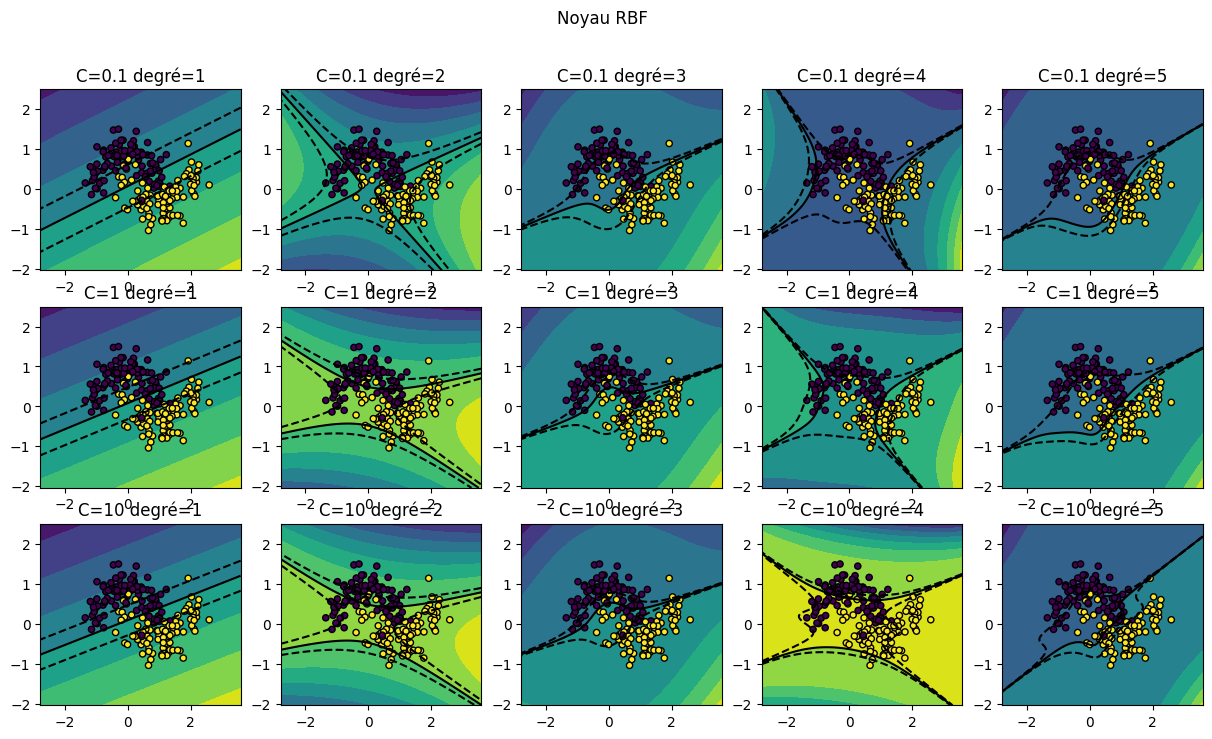

In [130]:
C=[0.1,1,10]
degre=[1, 2, 3, 4, 5]
fig , ax = plt.subplots (3, 5, figsize =(15, 8))
ax=ax.flatten()
index=0
for c in C:
    for d in degre :
            clf=SVC(kernel='poly',C=c,degree=d)
            clf.fit(X,y)
            score.append(clf.score(X,y)*100)  
            plt.suptitle('Noyau RBF')

            DecisionBoundaryDisplay.from_estimator(clf , X, ax=ax[index])
            DecisionBoundaryDisplay.from_estimator(clf , X, ax=ax[index] ,
            response_method="decision_function", plot_method="contour", levels =[-1, 0, 1],
            colors =["k", "k", "k"], linestyles =["--", "-", "--"])
            ax[index].set_title(f'C={c} degré={d}')

            ax[index].scatter(X_test[:, 0], X_test[:, 1], c=Y_test, s=20, edgecolors='k')
            index+=1

            